## Assignment 3

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



__This homework assignment document will guide you through five tasks in cleaning your data.__

1. Reading and Summarizing the Data.
2. Subsetting the Data.
3. Manage Missing Data.
4. Shape the Data.
5. Saving the Results. 

# NB: From now on you should submit 1) your notebook with the answers, remember that comments are good practice, 2) a working Git page with your assignment

In [9]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exercise 1: Loading the data:

- Load the `goodreads.csv` file into Python
- Explore it by looking at first and last 5 rows
- Change the column names to `["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name']`



In [42]:
#load goodreads.csv, headers are not included in the csv file
good_reads = pd.read_csv("./data/goodreads.csv", header= None ) 
#display first and last 5 rows to explore the data
display(good_reads.head(), good_reads.tail())

,0,1,2,3,4,5,6,7,8,9
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


,0,1,2,3,4,5,6,7,8,9
5995,4.17,2226.0,0767913736,good_reads:book,https://www.goodreads.com/author/show/44565.Ca...,2005.0,/genres/history|/genres/non-fiction|/genres/bi...,dir60/78508.The_River_of_Doubt.html,16618.0,The River of Doubt
5996,3.99,775.0,1416909427,good_reads:book,https://www.goodreads.com/author/show/151371.J...,2006.0,/genres/young-adult|/genres/realistic-fiction|...,dir60/259068.Shug.html,6179.0,Shug
5997,3.78,540.0,1620612321,good_reads:book,https://www.goodreads.com/author/show/5761314....,2012.0,/genres/contemporary|/genres/romance|/genres/y...,dir60/13503247-flawed.html,2971.0,Flawed
5998,3.91,281.0,NaN,good_reads:book,https://www.goodreads.com/author/show/1201952....,2006.0,/genres/religion|/genres/islam|/genres/religio...,dir60/2750008.html,3083.0,Ø£Ø³Ø¹Ø¯ Ø§Ù Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
5999,4.35,61.0,0786929081,good_reads:book,https://www.goodreads.com/author/show/1023510....,2001.0,/genres/fiction|/genres/fantasy|/genres/magic|...,dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...,3982.0,Legacy of the Drow Collector's Edition (Legacy...


In [43]:
#change column names

#set column names to specific columns
good_reads.columns = ["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'] 

#show first 5 rows to check new headers
good_reads.head() 

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455.0,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974.0,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648.0,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478.0,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746.0,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564.0,"Twilight (Twilight, #1)"
3,4.23,47906.0,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123.0,To Kill a Mockingbird
4,4.23,34772.0,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992.0,Pride and Prejudice


## Exercise 2: Subsetting the data

- Subset the data by creating new dataframe only with `["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']`

In [12]:
#create new dataframe from subset of existing dataframe
good_reads_subset = good_reads[["rating", 'isbn', 'author_url', 'year', 'genre_urls', 'name']] 

In [13]:
#show first 5 rows of new dataframe
good_reads_subset.head() 

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


## Exercise 3: Manage Missing Data
We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column


In [14]:
#check missing values in the subset dataframe
#make new function and check for missing data in good reads, count them aswell
missingvalues_count = good_reads_subset.isna().sum() 
#print count of missing values
print(missingvalues_count) 

rating          2
isbn          477
author_url      2
year            7
genre_urls     62
name            2
dtype: int64


In [15]:
# for rating, name and author 2 values are missing. 
#check if the missing values are located in the same rows
good_reads_subset.loc[good_reads_subset.rating.isnull()] 

,rating,isbn,author_url,year,genre_urls,name
3643,NaN,NaN,NaN,NaN,NaN,NaN
5282,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#drop rows where all values are missing & create new 'clean' dataframe
good_reads_subset_clean = good_reads_subset.dropna(how = 'all') 
#show first 5 rows 
good_reads_subset_clean.head() 

,rating,isbn,author_url,year,genre_urls,name
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)"
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)"
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice


In [47]:
#drop missing year values
good_reads_subset_clean = good_reads_subset_clean[good_reads_subset_clean.year.notnull()]

In [48]:
#check if missing rows are deleted
missingvalues_count1 = good_reads_subset_clean.isna().sum() 
#print missing values
print(missingvalues_count1) 

rating          0
isbn          471
author_url      0
year            0
genre_urls     59
name            0
dtype: int64


## Exercise 4: Shape the data
- Parse the `author_url` to create new column named `author`
- Sort the data by putting higher rates go first. If there are overlapping rates, try to put earlier years go first.
- **(Stretch Goal)** Examine how many books were published at each year and find lowest, highest rate of each year. 

In [52]:
#parse author_url to new column 'author'
#check where to split the author_url to get the author name
good_reads_subset_clean.loc[0,'author_url']

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [51]:
#add author column 
#split url by . & use lambda function to select last element to get author name
good_reads_subset_clean['author']= good_reads_subset_clean.author_url.str.split('.').apply(lambda x:x[-1])

In [26]:
#remove _ from name and add a space between the first and last name
good_reads_subset_clean['author']= good_reads_subset_clean.author.str.replace('_',' ')


In [27]:
#check if the author name column is added to the dataframe
good_reads_subset_clean.head() 

,rating,isbn,author_url,year,genre_urls,name,author
0,4.40,0439023483,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins
1,4.41,0439358078,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,Harry Potter and the Order of the Phoenix (Har...,J K Rowling
2,3.56,0316015849,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,"Twilight (Twilight, #1)",Stephenie Meyer
3,4.23,0061120081,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,To Kill a Mockingbird,Harper Lee
4,4.23,0679783261,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,Pride and Prejudice,Jane Austen


In [28]:
# sort by ratings, with ascending years 
good_reads_sort = good_reads_subset_clean.sort_values(by=['rating','year'], ascending = [False,True]) 
#show first 5 rows to check if the sorting worked
good_reads_sort.head() 

,rating,isbn,author_url,year,genre_urls,name,author
2909,5.0,0983002215,https://www.goodreads.com/author/show/6589034....,2011,NaN,Family Secrets,Rebekah McClew
2145,5.0,1300589469,https://www.goodreads.com/author/show/6906561....,2012,NaN,A Book About Absolutely Nothing.,I M Nobody
2903,5.0,0983002282,https://www.goodreads.com/author/show/6589034....,2012,NaN,Obscured Darkness (Family Secrets #2),Rebekah McClew
4473,5.0,NaN,https://www.goodreads.com/author/show/6896621....,2012,NaN,Patience's Love,Ronda Paige
5692,5.0,NaN,https://www.goodreads.com/author/show/5989528....,2012,NaN,Abstraction In Theory - Laws Of Physical Trans...,Subhajit Ganguly


In [74]:
#group data by year to be able to count per year
dfgb_year = good_reads_subset_clean.groupby('year') 
#count number of books per year
dfgb_year.year.value_counts() 


year
-1500      1
-800       2
-560       1
-512       1
-500       1
        ... 
 2010    317
 2011    374
 2012    355
 2013    276
 2014     87
Name: count, Length: 293, dtype: int64

In [65]:
#iterate over dataset to find the best rated books per year
for year, subset in good_reads_subset_clean.groupby('year'):
    #Find the best book of the year

    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(year, bestbook.name.values, bestbook.rating.values)
    else:
        print( year,bestbook.name.values[0], bestbook.rating.values[0])

-1500 The Epic of Gilgamesh 3.6
-800 The Iliad/The Odyssey 4.01
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 The History of the Peloponnesian War 3.84
-400 Complete Works 4.3
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
13 The Day Jesus Rode Into Croydon 3.85
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
632 The Quran 4.37
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine (Les Rougon-Macquart, #17) 4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Sha

In [67]:
#iterate over dataset to find the worst rated books per year
for year, subset in good_reads_subset_clean.groupby('year'):
    #Find the worst book of the year

    worstbook = subset[subset.rating == subset.rating.min()] #
    if worstbook.shape[0] > 1:
        print(year, worstbook.name.values, worstbook.rating.values)
    else:
        print( year, worstbook.name.values[0], worstbook.rating.values[0])

-1500 The Epic of Gilgamesh 3.6
-800 The Odyssey 3.68
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 Lysistrata 3.82
-400 The Oedipus Cycle 3.94
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
13 The Day Jesus Rode Into Croydon 3.85
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
632 The Quran 4.37
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine (Les Rougon-Macquart, #17) 4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Shahnameh 4.52
1100 Rubaiyat of Oma

## Exercise 5: Saving the results
- Save the cleaned dataframe as 'hw-03-cleaned.csv' in data folder

In [42]:
#save new data in folder, deleting the index but including headers
good_reads_sort.to_csv("data/hw-03-cleaned.csv", index=False, header=True) 

## Exercise 6: Investigate the relationship between the number of reviews and the average rating for books in the dataset cleaned-goodreads.csv procided.

- Calculate the correlation coefficient. Give me a short definition of this coefficient
- Create a scatter plot showing the relationship between these two features.
- Based on the plot and the correlation, provide a brief interpretation of the relationship.

### Python Tools: Use pandas and numpy for correlation, and matplotlib or seaborn for the scatter plot.

In [33]:
#load data
cleaned_goodreads = pd.read_csv("./data/cleaned-goodreads.csv") 
#check dataframe by showing the first 5 rows
cleaned_goodreads.head() 

,rating,review_count,isbn,booktype,author_url,year,dir,rating_count,name,author,genres
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)",Suzanne_Collins,young-adult|science-fiction|dystopia|fantasy|s...
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...,J_K_Rowling,fantasy|young-adult|fiction|fantasy|magic|chil...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)",Stephenie_Meyer,young-adult|fantasy|romance|paranormal|vampire...
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee,classics|fiction|historical-fiction|academic|s...
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen,classics|fiction|romance|historical-fiction|li...


In [30]:
#import library to use pearsons correlation
from scipy.stats import pearsonr 

In [31]:
cleaned = pd.read_csv("./data/cleaned-goodreads.csv")
# a correlation coefficient is a number between +1 and −1 calculated so as to represent the linear interdependence of two variables or sets of data. 
# only using .corr is not good enough cause it does not give the sample size and significance level
corr_coefficient, p_value = pearsonr(cleaned['review_count'], cleaned['rating'])

# Calculate the sample size (N)
n = len(cleaned)

# Print the results
print(f"Correlation coefficient: {corr_coefficient}")
print(f"Sample size (N): {n}")
#if the p_value is below 0.05 it is significant)
print(f"P-value (significance): {p_value}")


Correlation coefficient: -0.0378963725787529
Sample size (N): 5993
P-value (significance): 0.0033444150072515786


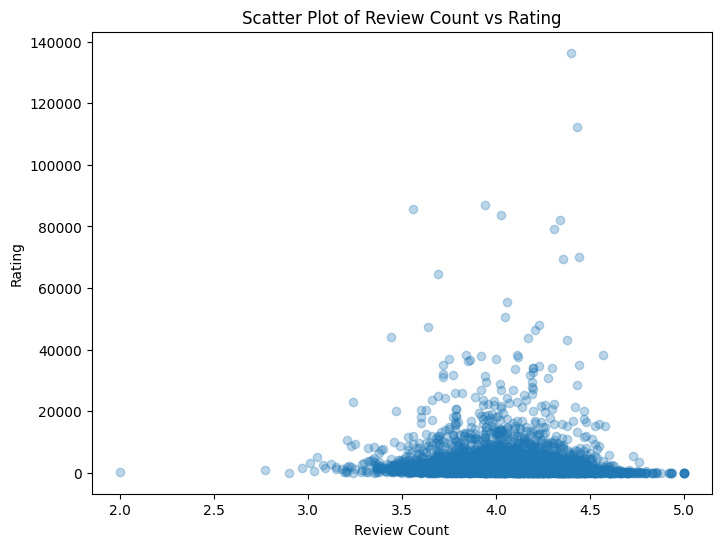

In [36]:
#create a scatterplot using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_goodreads['rating'], cleaned_goodreads['review_count'],alpha=0.3)

# Add titles and labels
plt.title('Scatter Plot of Review Count vs Rating')
plt.xlabel('Review Count')
plt.ylabel('Rating')

# Display the scatter plot
plt.show()

In [37]:
"""
Based  the correlation coeffient (-0.037896372578752856) that is statistically significant with a p-value lower than 0.05 (0.0033444150072515183), a weak negative correlation can be confirmed between review count and the rating of books. 
this means that books with a higher review count is more likely to have a lower rating.this does not neccessarily mean a causal relationship
The scatterplot does not show any indication of a correlation. this must be because the negative correlation is very weak. 

"""

'\nBased  the correlation coeffient (-0.037896372578752856) that is statistically significant with a p-value lower than 0.05 (0.0033444150072515183), a weak negative correlation can be confirmed between review count and the rating of books. \nthis means that books with a higher review count is more likely to have a lower rating.this does not neccessarily mean a causal relationship\nThe scatterplot does not show any indication of a correlation. this must be because the negative correlation is very weak. \n\n'

## Exercise 7: Calculate the following descriptive statistics for the numerical features (e.g., number of reviews, average rating, etc.):
- Mean
- Median
- Standard Deviation
- Range
- Create a histogram or box plot for at least one of the numerical features, highlighting any skewness or outliers.
    
### Python Tools: Use pandas for data manipulation and matplotlib or seaborn for visualization.

In [87]:

#descriptive statistics
#all descriptive statistics
cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].describe()

,rating,rating_count,review_count,year
count,5993.000000,5.993000e+03,5993.000000,5993.000000
mean,4.041997,5.118390e+04,2374.331220,1969.085099
std,0.260509,1.376493e+05,5493.093328,185.383169
min,2.000000,5.000000e+00,0.000000,-1500.000000
25%,3.870000,7.527000e+03,390.000000,1980.000000
50%,4.050000,1.807200e+04,936.000000,2002.000000
75%,4.210000,4.294300e+04,2212.000000,2009.000000
max,5.000000,2.958974e+06,136455.000000,2014.000000


In [97]:
#calculate the mean for the numerical columns
goodreads_mean = cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].mean()
#print values
print(goodreads_mean)

rating              4.041997
rating_count    51183.895879
review_count     2374.331220
year             1969.085099
dtype: float64


In [96]:
#calculate the median for the numerical columns
goodreads_median = cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].median()
#print values
print(goodreads_median)

rating              4.05
rating_count    18072.00
review_count      936.00
year             2002.00
dtype: float64


In [95]:
#calculate the standard deviation for the numerical columns
goodreads_std = cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].std()
#print values
print(goodreads_std)

rating               0.260509
rating_count    137649.335633
review_count      5493.093328
year               185.383169
dtype: float64


In [94]:
#calculate the range for the numerical columns
goodreads_range = cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].max()-cleaned_goodreads[['rating', 'rating_count', 'review_count', 'year']].min()
#print values
print(goodreads_range)

rating                3.0
rating_count    2958969.0
review_count     136455.0
year               3514.0
dtype: float64


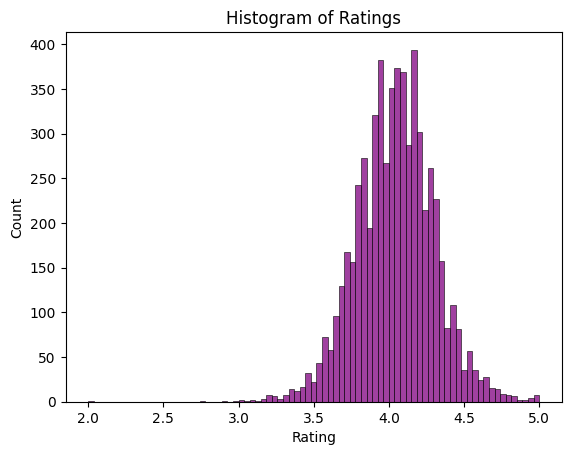

In [39]:
#plot histogram using seaborn 
sns.histplot(cleaned_goodreads['rating'], kde=False, color='purple'); 

# Add title and labels
plt.title('Histogram of Ratings')
plt.xlabel('Rating')

# Display the plot
plt.show()

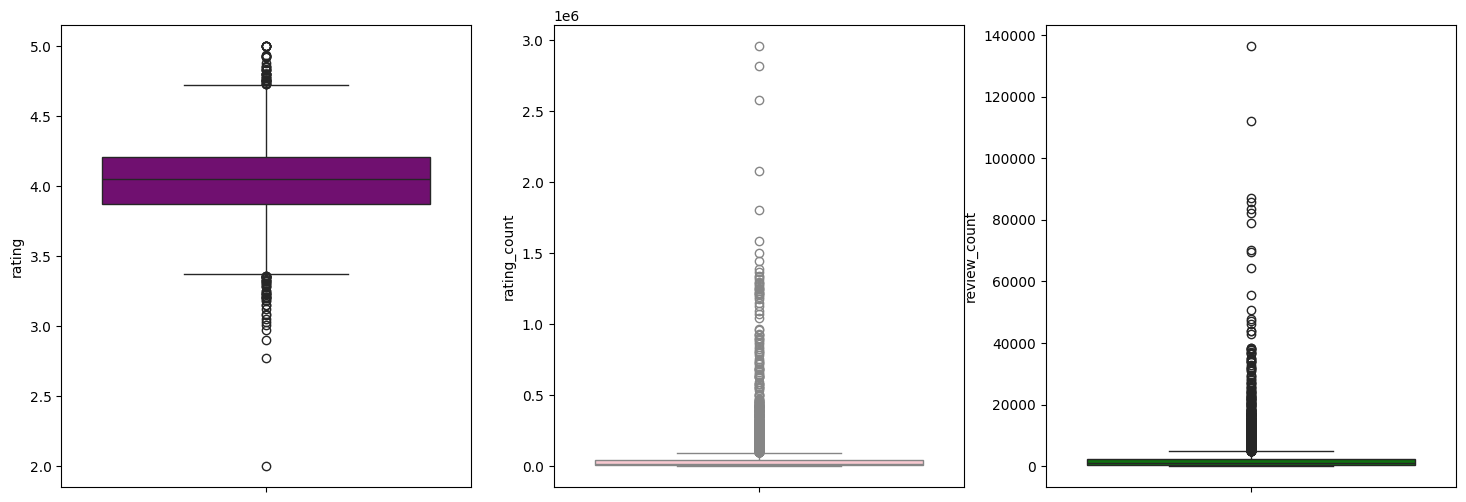

In [41]:
#plot a figure with 3 plots placed next to eachother
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

#plot 3 boxplots
sns.boxplot(cleaned_goodreads['rating'], color='purple', ax=axs[0]); #boxplot
sns.boxplot(cleaned_goodreads['rating_count'], color='pink', ax=axs[1]); #boxplot
sns.boxplot(cleaned_goodreads['review_count'], color='green', ax=axs[2]); #boxplot
